In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
import os
import gc
import re
from nltk.corpus import stopwords
#import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
df = pd.read_csv("./data/nba.csv")
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [34]:
df.shape

(1340, 21)

In [35]:
df.columns = ['Name','GamesPlayed','MinutesPlayed','PointsPerGame','FieldGoalsMade','FieldGoalAttempts','FieldGoalPercent','3PointMade','3PointAttempts','3PointAttempPercent','FreeThrowMade','FreeThrowAttempts','FreeThrowPercent','OffensiveRebounds','DefensiveRebounds','Rebounds','Assits','Steals','Blocks','TurnOvers','Outcome']

In [36]:
df.head()

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalAttempts,FieldGoalPercent,3PointMade,3PointAttempts,3PointAttempPercent,...,FreeThrowAttempts,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assits,Steals,Blocks,TurnOvers,Outcome
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [37]:
df = df.round()

In [38]:
df.head()

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalAttempts,FieldGoalPercent,3PointMade,3PointAttempts,3PointAttempPercent,...,FreeThrowAttempts,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assits,Steals,Blocks,TurnOvers,Outcome
0,Brandon Ingram,36,27.0,7.0,3.0,8.0,35.0,0.0,2.0,25.0,...,2.0,70.0,1.0,3.0,4.0,2.0,0.0,0.0,1.0,0.0
1,Andrew Harrison,35,27.0,7.0,2.0,7.0,30.0,1.0,3.0,24.0,...,3.0,76.0,0.0,2.0,2.0,4.0,1.0,0.0,2.0,0.0
2,JaKarr Sampson,74,15.0,5.0,2.0,5.0,42.0,0.0,2.0,24.0,...,1.0,67.0,0.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0
3,Malik Sealy,58,12.0,6.0,2.0,6.0,43.0,0.0,0.0,23.0,...,1.0,69.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0
4,Matt Geiger,48,12.0,4.0,2.0,3.0,52.0,0.0,0.0,0.0,...,2.0,67.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0


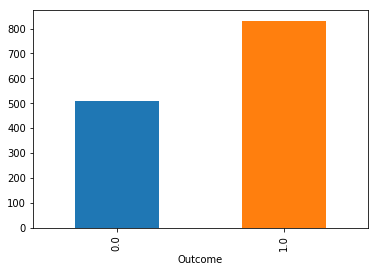

In [39]:
df.groupby("Outcome")['Outcome'].count().plot.bar()

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
dfp_subsampled = df
X = MinMaxScaler().fit_transform(df[['GamesPlayed','MinutesPlayed','PointsPerGame','FieldGoalsMade','FieldGoalAttempts','FieldGoalPercent','3PointMade','3PointAttempts','3PointAttempPercent','FreeThrowMade','FreeThrowAttempts','FreeThrowPercent','OffensiveRebounds','DefensiveRebounds','Rebounds','Assits','Steals','Blocks','TurnOvers']])
y = dfp_subsampled['Outcome'].values

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

C:\Conda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [40]:
df = df.dropna()

In [41]:
df.shape

(1329, 21)

In [42]:
data = df[['GamesPlayed','MinutesPlayed','PointsPerGame','FieldGoalsMade','FieldGoalAttempts','FieldGoalPercent','3PointMade','3PointAttempts','3PointAttempPercent','FreeThrowMade','FreeThrowAttempts','FreeThrowPercent','OffensiveRebounds','DefensiveRebounds','Rebounds','Assits','Steals','Blocks','TurnOvers']]
y = df[['Outcome']]

In [43]:
cols = list(data.columns)
for col in cols:
    data[col] = data[col].apply(pd.to_numeric)


C:\Conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
data.columns

Index(['GamesPlayed', 'MinutesPlayed', 'PointsPerGame', 'FieldGoalsMade',
       'FieldGoalAttempts', 'FieldGoalPercent', '3PointMade', '3PointAttempts',
       '3PointAttempPercent', 'FreeThrowMade', 'FreeThrowAttempts',
       'FreeThrowPercent', 'OffensiveRebounds', 'DefensiveRebounds',
       'Rebounds', 'Assits', 'Steals', 'Blocks', 'TurnOvers'],
      dtype='object')

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(data, y, stratify=y, test_size=0.3)

In [46]:
X_train.shape

(930, 19)

In [47]:
y_train.shape

(930, 1)

In [48]:
y_train.columns

Index(['Outcome'], dtype='object')

In [49]:
from collections import Counter
count = Counter(y_train['Outcome'])
y_train_total = len(y_train)
print("Total 1.0 in train data is {} %".format(count[0]*100/y_train_total))
print("Total 0.0 in train data is {} %".format(count[1]*100/y_train_total))

Total 1.0 in train data is 37.8494623655914 %
Total 0.0 in train data is 62.1505376344086 %


In [50]:
from collections import Counter
count = Counter(y_test['Outcome'])
y_test_total = len(y_test)
print("Total 1.0 in test is {} %".format(count[0]*100/y_test_total))
print("Total 0.0 in test is {} %".format(count[1]*100/y_test_total))

Total 1.0 in test is 37.84461152882206 %
Total 0.0 in test is 62.15538847117794 %


In [51]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()


Log loss on Test Data using Random Model 0.9114076508267821


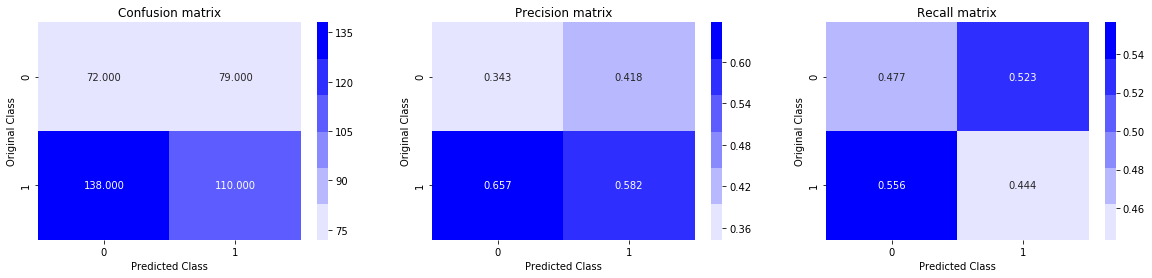

In [52]:
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
predicted_y = np.zeros((y_test_total,2))
for i in range(y_test_total):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

C:\Conda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Conda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Conda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Conda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of re

For values of alpha =  1e-05 The log loss is: 0.610499199359936
For values of alpha =  0.0001 The log loss is: 0.61049917562577
For values of alpha =  0.001 The log loss is: 0.6032361371366407
For values of alpha =  0.01 The log loss is: 0.6010447447895477
For values of alpha =  0.1 The log loss is: 0.5977822981772736
For values of alpha =  1 The log loss is: 0.5988933594818642
For values of alpha =  10 The log loss is: 0.5955009776880175
For values of alpha =  100 The log loss is: 0.5909807266722621
For values of alpha =  1000 The log loss is: 0.5944559924717541
For values of alpha =  10000 The log loss is: 0.6048172298678576
For values of alpha =  100000 The log loss is: 0.60650038403211


C:\Conda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Conda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Conda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Conda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not N

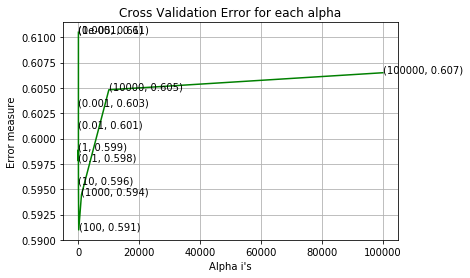

C:\Conda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Conda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Conda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Conda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of re

For values of best alpha =  100 The train log loss is: 0.5709625396049101
For values of best alpha =  100 The test log loss is: 0.5909807266722621
Total number of data points : 399


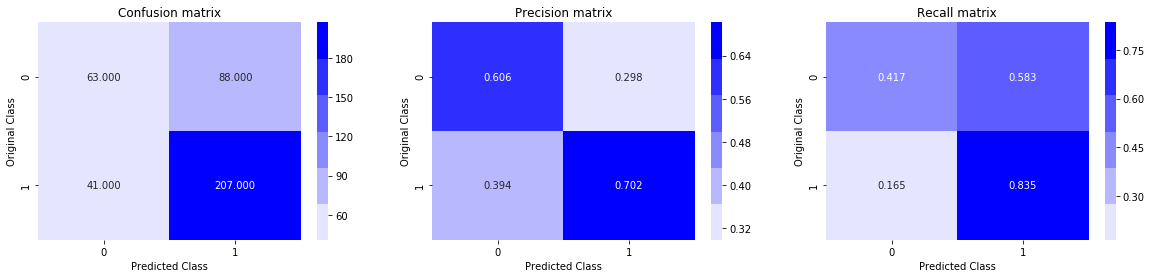

In [53]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
###logistic regression with hyper parameter tuning

alpha = [10 ** x for x in range(-5, 6)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [54]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
# params = {}
# params['objective'] = 'binary:logistic'
# params['eval_metric'] = 'logloss'
# params['eta'] = 0.02
# params['max_depth'] = 4

# d_train = xgb.DMatrix(X_train, label=y_train)
# d_test = xgb.DMatrix(X_test, label=y_test)

# watchlist = [(d_train, 'train'), (d_test, 'valid')]

# bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

# xgdmat = xgb.DMatrix(X_train,y_train)
# predict_y = bst.predict(d_test)
# print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


xgb_model = xgb.XGBClassifier()

#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.02,0.10], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1000], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X_train, y_train)
clf = GridSearchCV(xgb_model, parameters, n_jobs=5, cv=skf,scoring='f1',verbose=2, refit=True)

#trust your CV!

#print(clf.best_estimator_)
clf = xgb.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.02, max_delta_step=0, max_depth=6,
       min_child_weight=11, missing=-999, monotone_constraints=None,
       n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=1337, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=1337, silent=1,
       subsample=0.8, tree_method=None, validate_parameters=False,
       verbosity=None)
clf.fit(X_train, y_train)
predict_y = clf.predict(X_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=0.3))

C:\Conda\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Conda\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The test log loss is: 0.6136249216501399


In [60]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10000,max_depth=3, random_state=1,bootstrap = False)
clf.fit(X_train, y_train)
clf.feature_importances_
predict_y = clf.predict(X_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=0.3))

C:\Conda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The test log loss is: 0.6306133499285801


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression

tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]


#Using GridSearchCV
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

C:\Conda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Conda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Conda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Conda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Conda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' 

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
0.7666666666666665


C:\Conda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Conda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Conda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Conda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Conda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d 

C:\Conda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Conda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


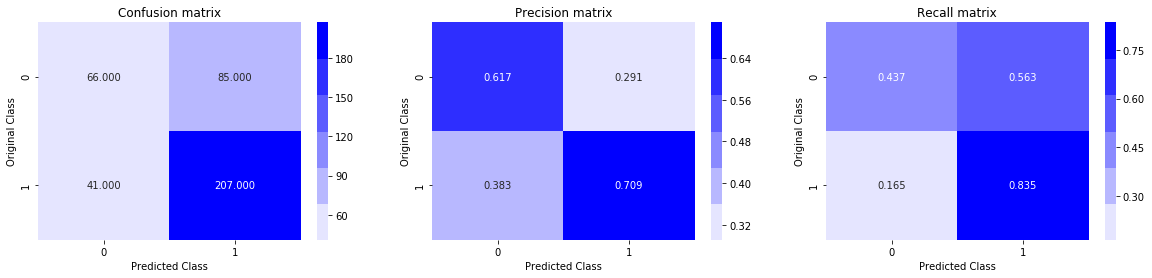

The test log loss is: 0.624242689324165


In [59]:
import numpy as np

clf = LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
clf.fit(X_train, y_train);
predicted_y = clf.predict(X_test)
plot_confusion_matrix(y_test, predicted_y)
print("The test log loss is:",log_loss(y_test, predicted_y, labels=clf.classes_, eps=0.3))